### Ukhem Fahmi Thoriqul Haq -  Biomedika - EMG Envelope

#### Import Library

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Make DataFrame EMG

In [2]:
df_emg = pd.read_csv("data/myo-forearm.csv", sep=";", header=None).dropna(axis=1, how="all")
df_emg

,0,1,2,3,4,5,6,7
0,0.0,0.0,2.0,-6.0,0.0,-6.0,-2.0,-1.0
1,2.0,17.0,1.0,-3.0,-4.0,8.0,0.0,-1.0
2,-3.0,-32.0,1.0,3.0,1.0,-8.0,0.0,-1.0
3,-5.0,6.0,0.0,1.0,5.0,-10.0,-3.0,-6.0
4,2.0,-3.0,-4.0,-1.0,-1.0,7.0,2.0,-1.0
...,...,...,...,...,...,...,...,...
2163,-4.0,-10.0,-1.0,-5.0,-1.0,6.0,-2.0,-1.0
2164,1.0,-24.0,-8.0,4.0,3.0,3.0,3.0,1.0
2165,4.0,20.0,6.0,-4.0,-5.0,-5.0,-2.0,0.0
2166,0.0,3.0,18.0,4.0,2.0,10.0,2.0,1.0


#### Displays 1 Channel MYO EMG Signal

(-150.0, 150.0)

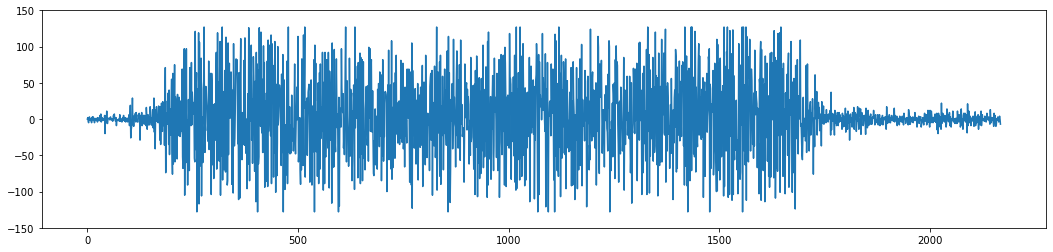

In [3]:
batas1 = 150
plt.rcParams["figure.figsize"] = (18,4)
plt.plot(df_emg[0])
plt.ylim(bottom=-batas1, top=batas1)

#### Displays 1 Channel MYO EMG Signal with Envelope EMG

(-150.0, 150.0)

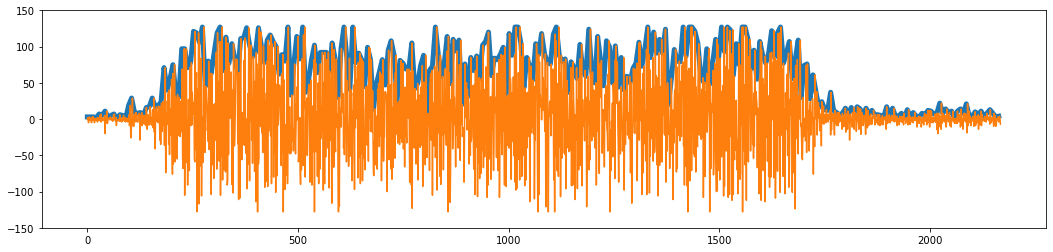

In [4]:
channel_1 = df_emg[0]

window = 7

plt.figure(figsize = (18,4))
plt.plot(range(0, channel_1.size, window), 
         [max(channel_1[a:a+window]) for a in range(0, channel_1.size, window)], lw=5)
plt.plot(channel_1)
plt.ylim(bottom=-batas1, top=batas1)

#### Make Keys & Values untuk Dictionary Envelope EMG

In [5]:
x1 = range(0, channel_1.size, window)

keys = []
for a in range(1,9):
    keys.append(f"{a}")

keys

['1', '2', '3', '4', '5', '6', '7', '8']

In [6]:
values = []
for i in range(0,8):
    channel = df_emg[i]
    y = [max(channel[a:a+window]) for a in range(0, channel.size, window)]
    values.append(y)

# print(values)

In [7]:
dict_envelope = dict(zip(keys, values))
# print(dict_envelope)

#### Make DataFrame Envelope EMG

In [8]:
dict_envelope = dict(zip(keys, values))
df_envelope = pd.DataFrame(dict_envelope)

df_envelope

,1,2,3,4,5,6,7,8
0,3.0,17.0,2.0,3.0,5.0,16.0,2.0,2.0
1,3.0,6.0,5.0,2.0,2.0,1.0,2.0,8.0
2,3.0,10.0,4.0,4.0,4.0,2.0,5.0,2.0
3,2.0,16.0,7.0,0.0,2.0,7.0,2.0,0.0
4,7.0,25.0,7.0,4.0,2.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...
305,8.0,21.0,14.0,10.0,9.0,10.0,4.0,4.0
306,13.0,21.0,23.0,6.0,6.0,7.0,5.0,5.0
307,8.0,35.0,17.0,8.0,5.0,9.0,8.0,5.0
308,3.0,29.0,15.0,5.0,5.0,3.0,2.0,2.0


#### Displays all EMG Envelope channels stacked with Original EMG Signals and smoothment on envelope

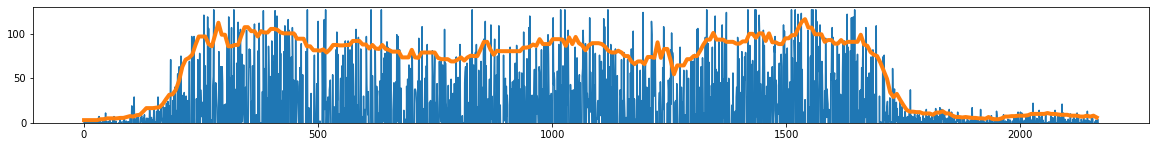

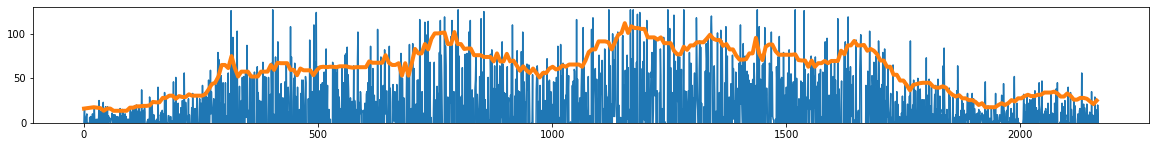

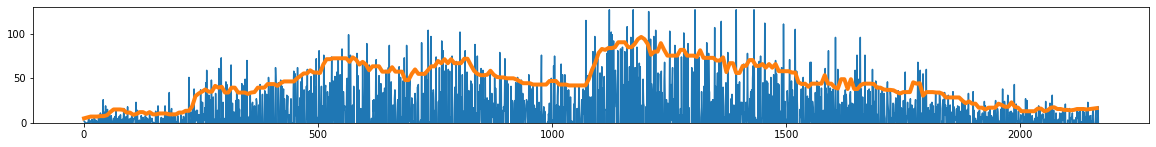

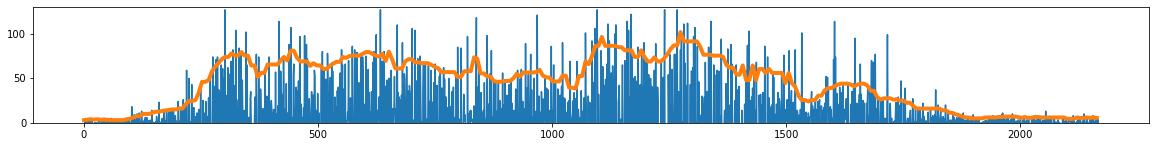

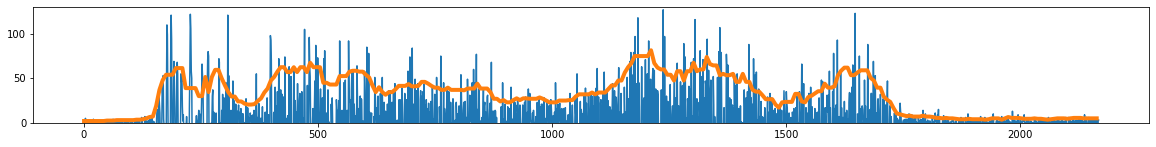

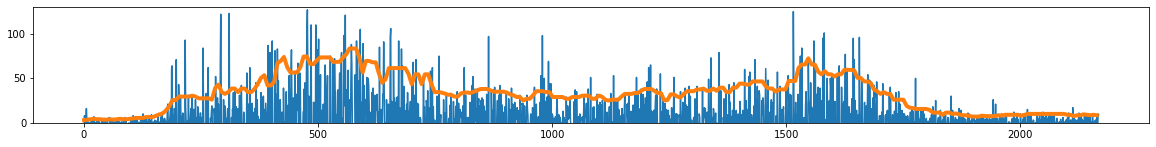

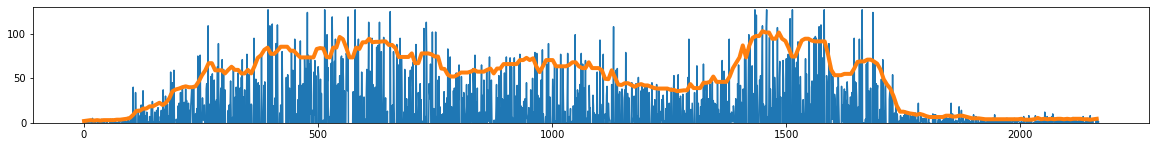

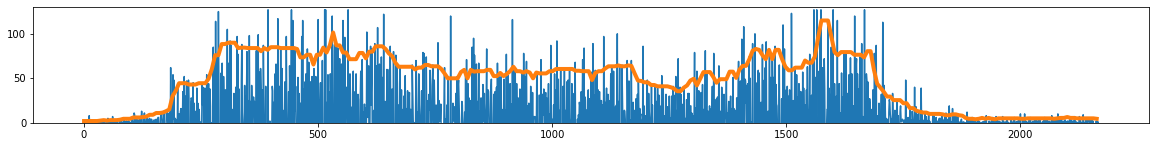

In [9]:
atas = 130
batas_1 = [0, 170, 500, 800, 1100, 1400, 1730, 2168]

for a in range(1,9):
    smotDeriv = df_envelope[f"{a}"].rolling(window=10, min_periods=5, center=True).median()
    shape = f"81{a}"
    
    plt.figure(figsize = (20,20))
    plt.subplot(int(shape))
    plt.plot(df_emg[a-1])
    plt.plot(x1, smotDeriv, lw=4)
    plt.ylim(bottom=0, top=atas)

You can change the smoothness by setting the value of variable window & min_periods

#### Displays the entire EMG Envelope signal with a delimiter for each handshape

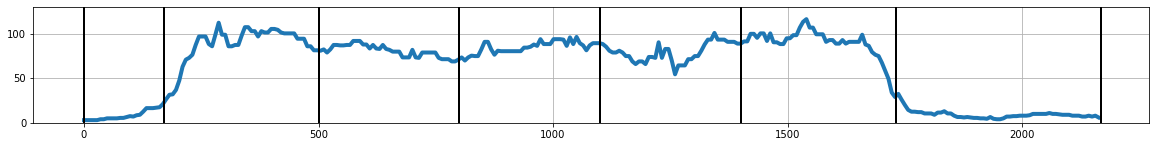

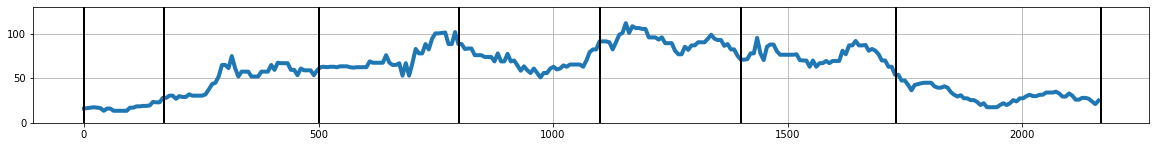

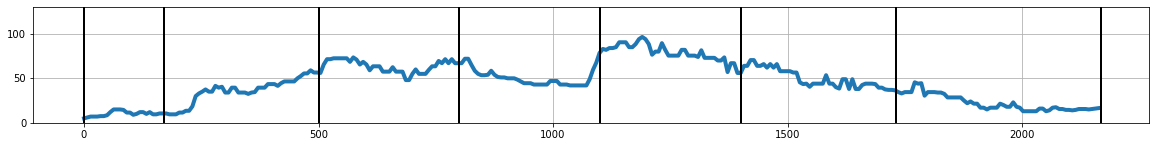

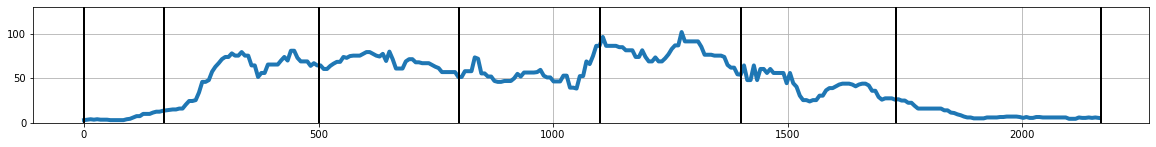

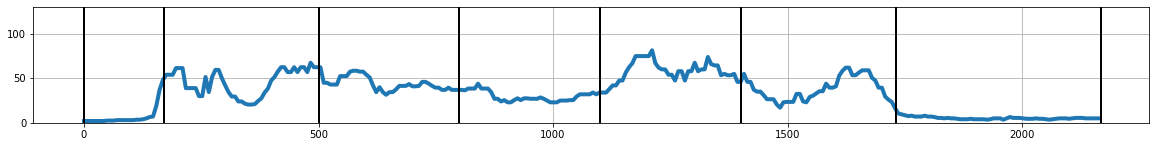

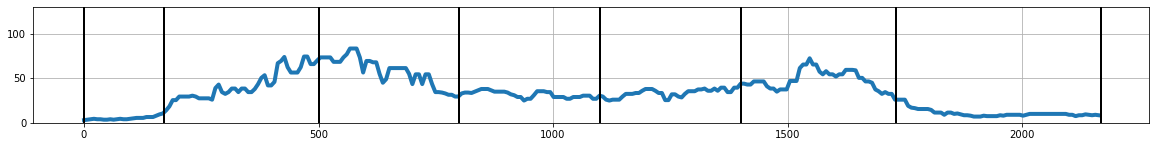

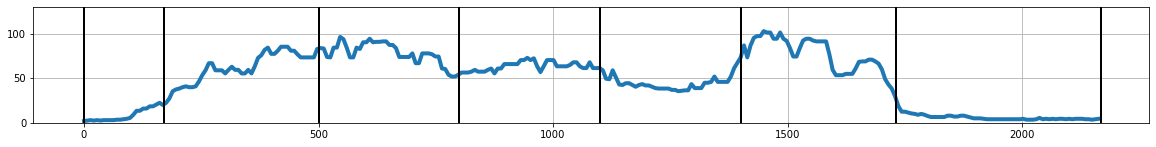

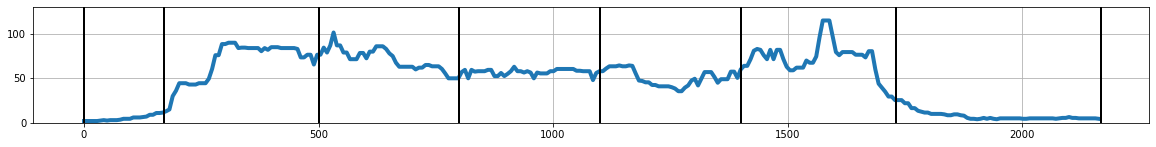

In [10]:
for a in range(1,9):
    smotDeriv = df_envelope[f"{a}"].rolling(window=10, min_periods=5, center=True).median()
    shape = f"81{a}"
    
    plt.figure(figsize = (20,20))
    plt.subplot(int(shape)).grid()
    plt.plot(x1, smotDeriv, lw=4)
    for a in batas_1:
        plt.axvline(a, color="black", lw=2)
    plt.ylim(bottom=0, top=atas)

Handshape 1 = 0 - 170

Handshape 2 = 171 - 500

Handshape 3 = 501 - 800

Handshape 4 = 801 - 1100

Handshape 5 = 1101 - 1400

Handshape 6 = 1401 - 1730

Handshape 7 = 1730 - 2168

|Handshape 1|Handshape 2|Handshape 3|Handshape 4|Handshape 5|Handshape 6|Handshape 7|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan1.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan2.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan3.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan4.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan5.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan6.jpg" width="300" />|<img src="https://raw.githubusercontent.com/UFTHaq/Images/main/Gerakan7.jpg" width="300" />|

For use, the Myo Armband is attached to the top of the forearm.
Channel 4 is on the front of the forearm, Channel 8 is on the back of the forearm. For use, the Myo Armband is attached to the top of the forearm.
Channel 4 is on the front of the forearm, Channel 8 is on the back of the forearm

In handshape 1, all hand muscles relax and from 8 channels, which show a little signal are channels 2 and 3 which contract slightly to keep the fingers straight

In handshape 2, all hand muscles contract as hard as they can, and channels 1 and 8 have the highest signal because they are located at the bottom of the forearm which contributes more to gripping

In handshape 3, the part of the hand that contracts is the back forearm which can be seen on channels 1, 2, 6, 7, 8.

In handshape 4, the hand movement is the same as movement no 2, and the resulting signal is only slightly different because the hand grip strength is weaker than movement no 2.

In handshape 5, the part of the hand that contracts is the front forearm, which can be seen on channels 1, 2, 3, 4.

In handshape 6, the hand movements are the same as movements no. 2 and 4, and the signals are only slightly different due to the strength of the hand grip.

In handshape 7, all hand muscles relax again, and all channels are close to 0 except for channels 2 and 3 which contract slightly to keep the fingers straight.